In [19]:
#importing certain libraries
import numpy as np
import pandas as pd
import sklearn

In [20]:
#importing datasets  
data_set = pd.read_csv('D:/healthcare_dataset.csv',header = None)

In [21]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data_set.head())

First few rows of the dataset:
                  0    1       2           3                  4   \
0               Name  Age  Gender  Blood Type  Medical Condition   
1    Tiffany Ramirez   81  Female          O-           Diabetes   
2        Ruben Burns   35    Male          O+             Asthma   
3          Chad Byrd   61    Male          B-            Obesity   
4  Antonio Frederick   49    Male          B-             Asthma   

                  5               6                          7   \
0  Date of Admission          Doctor                   Hospital   
1         2022-11-17  Patrick Parker           Wallace-Hamilton   
2         2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
3         2019-01-09      Paul Baker                 Walton LLC   
4         2020-05-02  Brian Chandler                 Garcia Ltd   

                   8                   9            10              11  \
0  Insurance Provider      Billing Amount  Room Number  Admission Type   
1        

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
# Simulated dataset creation
np.random.seed(42)
data = {
    'Name': [f'Patient_{i}' for i in range(10001)],
    'Age': np.random.randint(18, 90, 10001),
    'Gender': np.random.choice(['Male', 'Female'], 10001),
    'Blood Type': np.random.choice(['A', 'B', 'AB', 'O'], 10001),
    'Medical Condition': np.random.choice(['A', 'B', 'C'], 10001),
    'Room Number': np.random.randint(1, 101, 10001),  # Creating 'Room Number' column
    'Admission Type': np.random.choice(['Emergency', 'Scheduled'], 10001)  # Creating 'Admission Type' column
}

In [24]:
# Creating a DataFrame
df = pd.DataFrame(data)

In [25]:
# Adding more columns to the DataFrame
df['Date of Admission'] = pd.date_range('20220101', periods=10001)  # Example date range
df['Doctor'] = np.random.choice(['Dr. Smith', 'Dr. Johnson', 'Dr. Williams'], 10001)
df['Hospital'] = np.random.choice(['Hospital_A', 'Hospital_B', 'Hospital_C'], 10001)
df['Insurance'] = np.random.choice(['Yes', 'No'], 10001)
df['Billing Amount'] = np.random.randint(100, 10000, 10001)
df['Discharge Date'] = pd.date_range('20220105', periods=10001)  # Example date range
df['Medication'] = np.random.choice(['Med_A', 'Med_B', 'Med_C'], 10001)
df['Test Results'] = np.random.choice(['Result_X', 'Result_Y', 'Result_Z'], 10001)

In [27]:
# Assuming 'Length of Stay' is the target for classification
df['Length of Stay'] = np.random.choice([0, 1], 10001)  # Simulating a binary classification

In [28]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Blood Type'] = label_encoder.fit_transform(df['Blood Type'])
df['Medical Condition'] = label_encoder.fit_transform(df['Medical Condition'])
df['Room Number'] = label_encoder.fit_transform(df['Room Number'])
df['Admission Type'] = label_encoder.fit_transform(df['Admission Type'])
df['Date of Admission'] = label_encoder.fit_transform(df['Date of Admission'])
df['Doctor'] = label_encoder.fit_transform(df['Doctor'])
df['Hospital'] = label_encoder.fit_transform(df['Hospital'])
df['Insurance'] = label_encoder.fit_transform(df['Insurance'])
df['Billing Amount'] = label_encoder.fit_transform(df['Billing Amount'])
df['Discharge Date'] = label_encoder.fit_transform(df['Discharge Date'])
df['Medication'] = label_encoder.fit_transform(df['Medication'])
df['Test Results'] = label_encoder.fit_transform(df['Test Results'])

In [29]:
# Assuming 'Length of Stay' is the target variable
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Room Number', 'Admission Type']
X = df[features]
y = df['Length of Stay']

In [30]:
# Identify missing values
missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Room Number          0
Admission Type       0
dtype: int64


In [31]:
# Handle Missing Values
# Replace missing values in numerical columns with mean
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
X.loc[:, numerical_columns] = X.loc[:, numerical_columns].fillna(X.loc[:, numerical_columns].mean()).copy()

In [32]:
# Encode Categorical Variables
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize the StandardScaler
st_x = StandardScaler()

# Fit and transform the training set
X_train_scaled = st_x.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = st_x.transform(X_test)

In [34]:
# Summary statistics
summary_stats = X_train.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                Age       Gender   Blood Type  Medical Condition  Room Number  \
count  8000.000000  8000.000000  8000.000000        8000.000000   8000.00000   
mean     35.498500     0.488625     1.510500           0.991625     49.72950   
std      20.739835     0.499902     1.119731           0.821364     28.54333   
min       0.000000     0.000000     0.000000           0.000000      0.00000   
25%      17.750000     0.000000     1.000000           0.000000     25.00000   
50%      35.000000     0.000000     2.000000           1.000000     51.00000   
75%      54.000000     1.000000     3.000000           2.000000     74.00000   
max      71.000000     1.000000     3.000000           2.000000     99.00000   

       Admission Type  
count     8000.000000  
mean         0.505875  
std          0.499997  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [35]:
# Validate transformations
# For instance, compare original vs. transformed data
# For StandardScaler, compare mean and standard deviation before and after scaling
original_mean = X_train.mean()
original_std = X_train.std()

scaled_mean = X_train_scaled.mean()
scaled_std = X_train_scaled.std()

print("Original Mean:", original_mean)
print("Scaled Mean:", scaled_mean)
print("Original Standard Deviation:", original_std)
print("Scaled Standard Deviation:", scaled_std)

Original Mean: Age                  35.498500
Gender                0.488625
Blood Type            1.510500
Medical Condition     0.991625
Room Number          49.729500
Admission Type        0.505875
dtype: float64
Scaled Mean: 3.1974423109204506e-17
Original Standard Deviation: Age                  20.739835
Gender                0.499902
Blood Type            1.119731
Medical Condition     0.821364
Room Number          28.543330
Admission Type        0.499997
dtype: float64
Scaled Standard Deviation: 0.9999999999999999


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Assuming 'Length of Stay' is the target variable
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Room Number', 'Admission Type']
X = df[features]
y = df['Length of Stay']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

In [41]:
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [58]:
# Print accuracy with more than two decimal places
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')

# Print classification report with more than two decimal places
report_dt = classification_report(y_test, y_pred_dt, digits=4)
print('Decision Tree Classification Report:\n', report_dt)

Decision Tree Accuracy: 0.4923
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0     0.5055    0.4946    0.5000      1027
           1     0.4789    0.4897    0.4843       974

    accuracy                         0.4923      2001
   macro avg     0.4922    0.4922    0.4921      2001
weighted avg     0.4925    0.4923    0.4923      2001



In [59]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [63]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

In [64]:
# Print Random Forest accuracy with more than two decimal places
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Print Random Forest classification report with more than two decimal places
report_rf = classification_report(y_test, y_pred_rf, digits=4)
print('Random Forest Classification Report:\n', report_rf)

Random Forest Accuracy: 0.4968
Random Forest Classification Report:
               precision    recall  f1-score   support

           0     0.5099    0.5034    0.5066      1027
           1     0.4833    0.4897    0.4865       974

    accuracy                         0.4968      2001
   macro avg     0.4966    0.4966    0.4966      2001
weighted avg     0.4969    0.4968    0.4968      2001



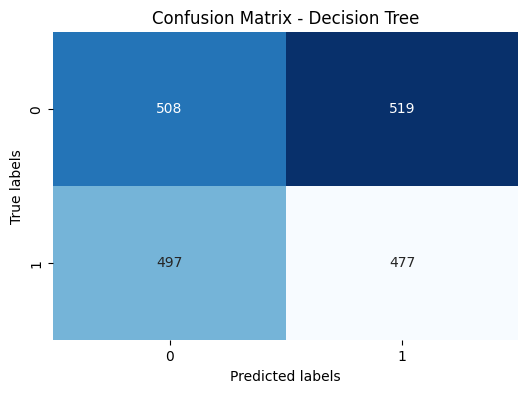

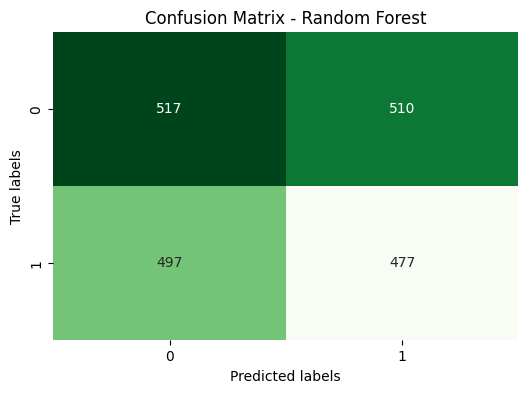

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [66]:
# Model Tuning
# Define a grid of hyperparameters
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
# Use GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [68]:
# Retrieve the best parameters
best_params_dt = grid_search_dt.best_params_
tuned_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
tuned_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)

In [51]:
# Define a grid of hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [54]:
# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [55]:
# Retrieve the best parameters
best_params_rf = grid_search_rf.best_params_
tuned_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
tuned_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [56]:
# Decision Tree Model Evaluation after Tuning
y_pred_tuned_dt = tuned_dt_model.predict(X_test)
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)
report_tuned_dt = classification_report(y_test, y_pred_tuned_dt)

print(f'Tuned Decision Tree Accuracy: {accuracy_tuned_dt:.4f}')
report_tuned_dt = classification_report(y_test, y_pred_tuned_dt, digits=4)
print('Tuned Decision Tree Classification Report:\n', report_tuned_dt)

# Random Forest Model Evaluation after Tuning
y_pred_tuned_rf = tuned_rf_model.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)

print(f'Tuned Random Forest Accuracy: {accuracy_tuned_rf:.4f}')
report_tuned_rf = classification_report(y_test, y_pred_tuned_rf, digits=4)
print('Tuned Random Forest Classification Report:\n', report_tuned_rf)

Tuned Decision Tree Accuracy: 0.5057
Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

           0     0.5162    0.5910    0.5511      1027
           1     0.4909    0.4158    0.4503       974

    accuracy                         0.5057      2001
   macro avg     0.5035    0.5034    0.5007      2001
weighted avg     0.5039    0.5057    0.5020      2001

Tuned Random Forest Accuracy: 0.4988
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0     0.5119    0.5024    0.5071      1027
           1     0.4854    0.4949    0.4901       974

    accuracy                         0.4988      2001
   macro avg     0.4987    0.4987    0.4986      2001
weighted avg     0.4990    0.4988    0.4988      2001



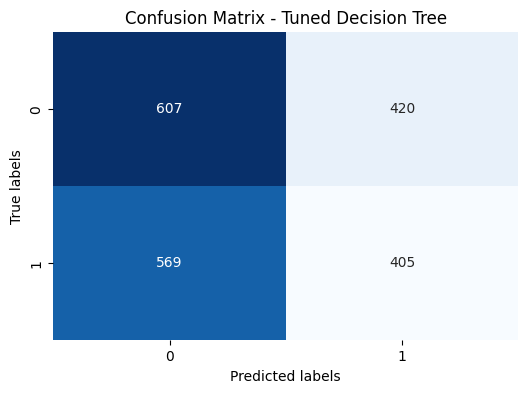

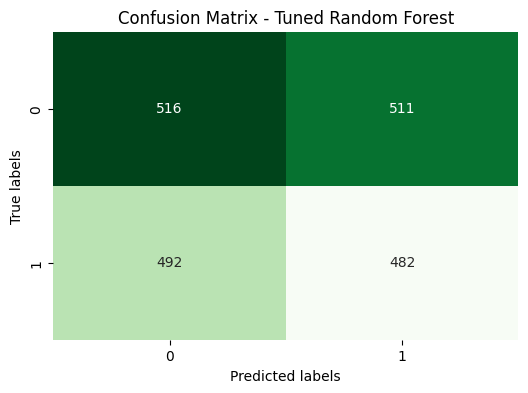

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Tuned Decision Tree
cm_tuned_dt = confusion_matrix(y_test, y_pred_tuned_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned_dt, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.show()

# Confusion Matrix for Tuned Random Forest
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned_rf, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()